In [3]:
## ------This notebook will look at the outputs of scattering module and make some plots------

# start with necessary includes. Currently will also include scattering module 
# at every cell so it reloads if I make changes to code

using Plots
include("../modules/scattering.jl")


Main.Scattering

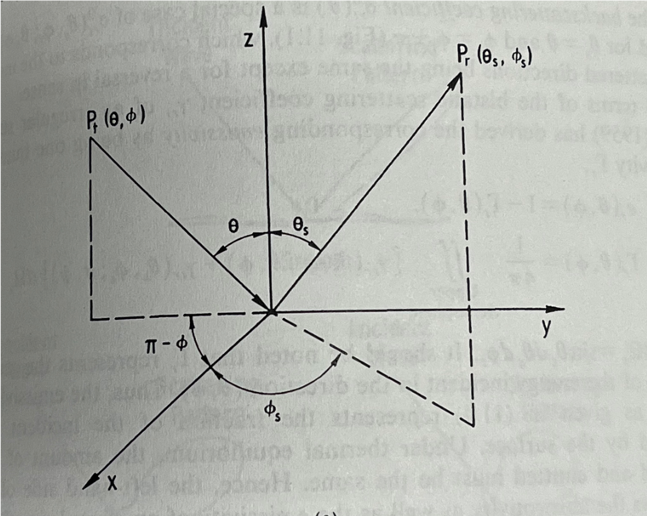

In [78]:
#displaying picture of the coordinate system and what the angles mean:
#θ are incidence angles measured from the z axis, ϕ are azimuth angles measured in the x-y plane w/ x axis = 0
# Pₜ is the transmitter location, Pᵣ is the receiver location.
display("image/png", read("geometry.png"))

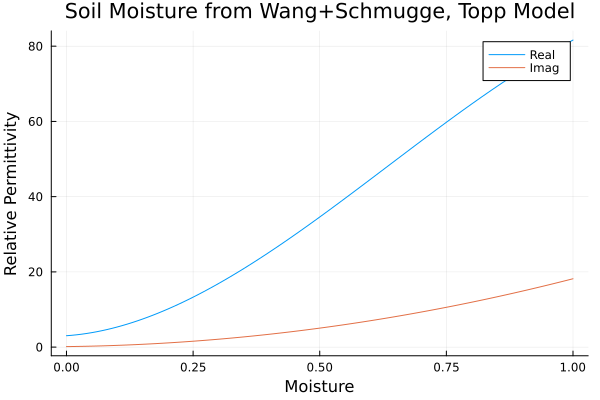

In [2]:
# This is a plot of the relative permittivity vs. soil moisture using emperically based models from Wang+Schmugge and Topp
# The soil moisture goes from 0 (leading to their measured permittivity of dry soil which is ~3) to 1
# (which is about the permittivity of pure water). It is very easy to change this code to be another SM model or to fix a 
# certain permittivity value


include("../modules/scattering.jl")
using Plots
# plot dielectric vs soil moisture
θᵥ = 0:.01:1
ϵ = Scattering.soil_dielectric.(θᵥ)
ϵₒ = 8.854e-12
plot(θᵥ,real(ϵ)./ϵₒ,label="Real")
plot!(θᵥ,imag(ϵ)./ϵₒ,label="Imag")
plot!(title = "Soil Moisture from Wang+Schmugge, Topp Model", xlabel = "Moisture", ylabel = "Relative Permittivity",)

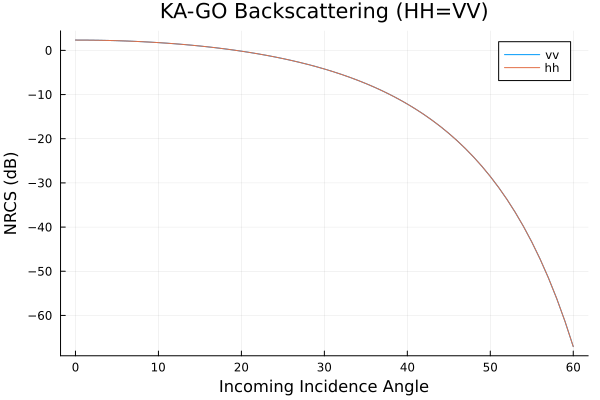

In [4]:
## This makes a plot of the Normalized Radar Cross-Section (σₒ) for a rough surface using the Kirchoff approximation
# -Geometrical Optics thoery. In this particular case, the equations were reduced for the specific back scatter case,
# where transmitted signal incidence angle (θᵢ) = scattered direction incidence angle (θₛ). These angles are measured
# from the +z axis, which points directly up in a local ENU frame. 0 degrees would be nadir looking. The azimuth 
#angles (ϕ and ϕₛ) are measured from the "x-axis" however only the relative azimuth angles between the incident and scattered
#signals matter


include("../modules/scattering.jl")
# plot BRCS of KA-GO in back scatter direction only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 1m correlation length?
σ = 1 # 2m RMS surface roughness
θ = 0:60

if λ*σ < l^2/2.76
    
    σʳ_vh,  σʳ_hv,  σʳ_vv,  σʳ_hh = Scattering.BRCS_KA_backscatter(θ,σ,l,θᵥ)
else
    display("Doesn't meet surface criteria")
end
# plot(θ,σʳ_vh,label="vh")
# plot!(θ,σʳ_hv,label="hv")
plot(θ,10*log10.(σʳ_vv),label="vv")
plot!(θ,10*log10.(σʳ_hh),label="hh")
plot!(title = "KA-GO Backscattering (HH=VV)", xlabel = "Incoming Incidence Angle", ylabel = "NRCS (dB)")


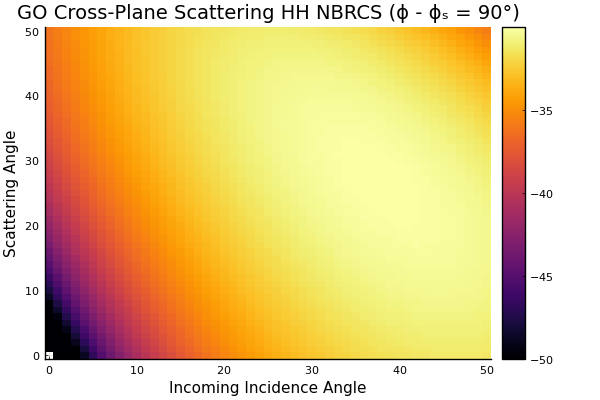

In [200]:
## This cell uses the full bistatic version of the KA-GO codes (no assumptions about incident and scattered angles)
# In the plot, the incidence angles of the incoming and scattered directions vary, and the azimuth is fixed to be 90deg
# apart. 180 degrees = backscatter, 0 degrees = directly forward scatter, so 90 is what I call the "cross-plane" since it is 
# perpendicular to the incoming signal plane


# import Pkg; Pkg.add("PyPlot")
pyplot()
include("../modules/scattering.jl")
# plot BRCS of KA-GO in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 1m correlation length?
σ = 1 # 2m RMS surface roughness
θᵢ = 0:50
θₛ = 0:50
ϕ = 0
ϕₛ = 90

N = length(θᵢ)
M = length(θₛ)
σʳ_vh = zeros(N,M)
σʳ_hv = zeros(N,M)
σʳ_vv = zeros(N,M)
σʳ_hh = zeros(N,M)
if λ*σ < l^2/2.76
    for i = 1 :N
        for j = 1 : M
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,σ,l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end

# plot(θ,σʳ_vh,label="vh")
# plot!(θ,σʳ_hv,label="hv")
# plot!(θ,σʳ_vv,label="vv")
# plot!(θ,σʳ_hh,label="hh")
# plot!(title = "KA-GO Scattering", xlabel = "Incidence Angle", ylabel = "NBRCS")

# heatmap(θᵢ,θₛ,σʳ_vv,xlabel="Incidence Angle",ylabel="Scattering Angle",title="GO Cross-Plane Scattering VV NBRCS (phi - phi_s = pi/2)")
peak_value = maximum(10*log10.(σʳ_hh[:]))
heatmap(θᵢ,θₛ,10*log10.(σʳ_hh),xlabel="Incoming Incidence Angle",ylabel="Scattering Angle",
    title="GO Cross-Plane Scattering HH NBRCS (ϕ - ϕₛ = 90°)",clim=(peak_value-20, peak_value))


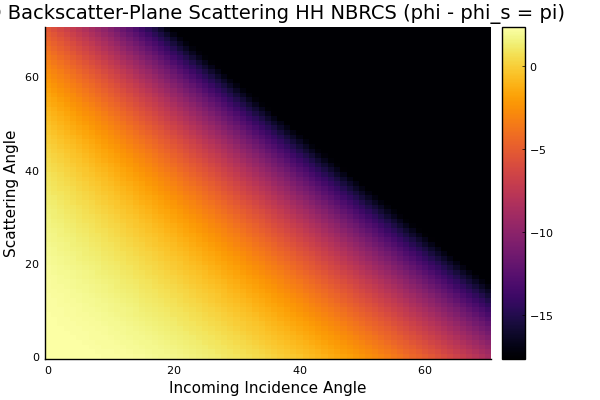

In [199]:
## This cell is the same as the previous, except we are looking in the "backscatter plane" The diagonal where 
#  incidence = scattering angles would be the exact backscattering direction.
# It looks like the roll off of sigma_0 is relatively slow as you depart from the back scatter direction in either incident

include("../modules/scattering.jl")
# plot BRCS of KA-GO in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
λ = 25e-2 # assume 25cm wavelength?
l = 5 # 5m correlation length?
σ = 1 # m RMS surface roughness
θᵢ = 0:70
θₛ = 0:70 
ϕ = 0
ϕₛ = 180

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,σ,l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end

# peak_value = 10*log10(maximum(σʳ_vv))
# heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
# xlabel="Incidence Angle",ylabel="Scattering Angle",
# title="GO Backscatter-Plane Scattering VV NBRCS (phi - phi_s = pi)",
# clim=(peak_value-20, peak_value))


peak_value = 10*log10(maximum(σʳ_hh))
heatmap(θᵢ, θₛ, 10*log10.(σʳ_hh),
xlabel="Incoming Incidence Angle",ylabel="Scattering Angle",
title="GO Backscatter-Plane Scattering HH NBRCS (phi - phi_s = pi)",
clim=(peak_value-20, peak_value))

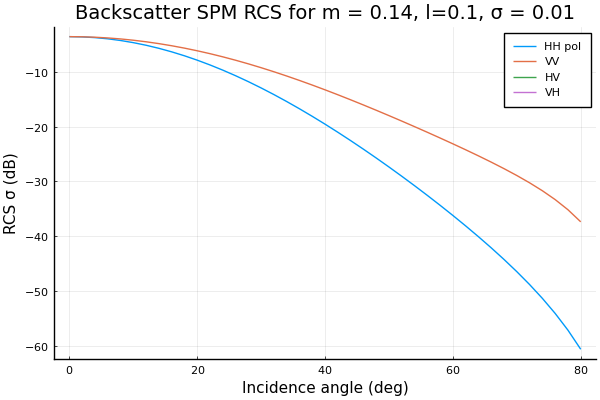

In [6]:
# Now, we switch to another set of assumptions about the surface, which is small-scale roughness where the roughness is smaller
# than wavelength level. We use an approximation called the Small-Perturbation Method (SPM)
# The version used of the SPM comes from Leung Tsang's book

#Again, this cell uses the equations to look at the backscattering direction only (simplified from arbitrary angle eqs.)

include("../modules/scattering.jl")
## testing the backscattering sections of the code 
λ = 25e-2
# k = 2*pi/λ
θ_vec = 0:2:80
nθ = length(θ_vec)
l = .1
σ = λ/25
m = sqrt(2)*σ/l
m = round(m; digits=2)
θᵥ = 0.2

BRCS_table_vh = Array{Float64, 1}(undef, nθ)
BRCS_table_hv = Array{Float64, 1}(undef, nθ)
BRCS_table_vv = Array{Float64, 1}(undef, nθ)
BRCS_table_hh = Array{Float64, 1}(undef, nθ)
for i = 1 : nθ
    σʳ_vh,  σʳ_hv,  σʳ_vv,  σʳ_hh  = Scattering.BRCS_SPM_backscatter(λ,θ_vec[i],l,σ,θᵥ)
    BRCS_table_vh[i] = 10*log10.(σʳ_vh)
    BRCS_table_hv[i] = 10*log10.(σʳ_hv)
    BRCS_table_vv[i] = 10*log10.(σʳ_vv)
    BRCS_table_hh[i] = 10*log10.(σʳ_hh)
end
plot(θ_vec, BRCS_table_hh,label="HH pol")
plot!(θ_vec, BRCS_table_vv,label="VV")
plot!(θ_vec, BRCS_table_hv,label="HV")
plot!(θ_vec, BRCS_table_vh,label= "VH")
xlabel!("Incidence angle (deg)")
ylabel!("RCS σ (dB)")
title!("Backscatter SPM RCS for m = $m, l=$l, σ = $σ")

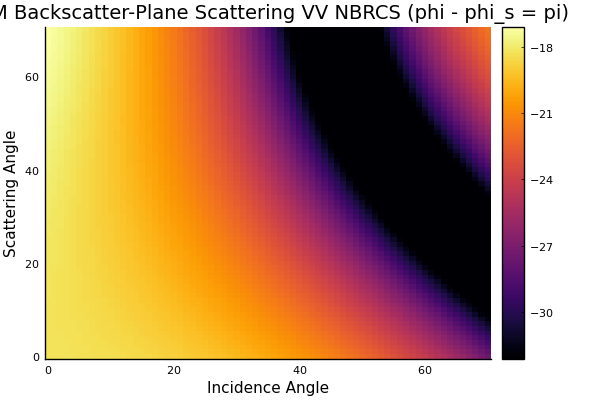

In [138]:
# here we expand to the arbitrary incoming/scattering angles.
# The large dark swath across the plot represents the brewster angle effects in the VV. HH does not have this component


include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = .1
λ = 25e-2
σ = λ/20
m = sqrt(2)*σ/l
m = round(m; digits=2)
ϕ = 0
ϕₛ = 0
θᵢ = 0:70
θₛ = 0:70 

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,l,σ,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end


peak_value = 10*log10(maximum(σʳ_vv))
heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
xlabel="Incidence Angle",ylabel="Scattering Angle",
title="SPM Backscatter-Plane Scattering VV NBRCS (phi - phi_s = pi)",
clim=(peak_value-15, peak_value))

# peak_value = 10*log10(maximum(σʳ_hh))
# heatmap(θᵢ, θₛ, 10*log10.(σʳ_hh),
# xlabel="Incidence Angle",ylabel="Scattering Angle",
# title="SPM Backscatter-Plane Scattering HH NBRCS (phi - phi_s = pi)",
# clim=(peak_value-5, peak_value))

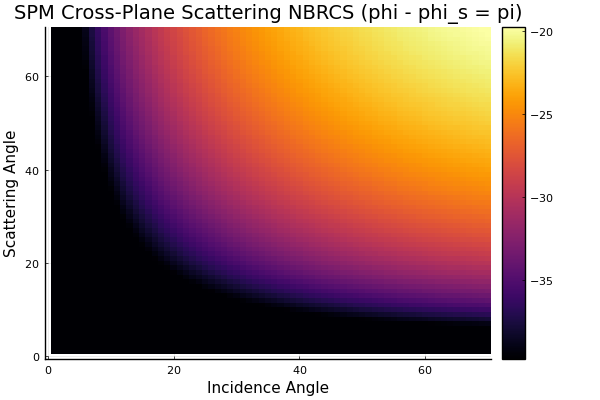

In [53]:
include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = .1
λ = 25e-2
σ = λ/25
m = sqrt(2)*σ/l
m = round(m; digits=2)
ϕ = 0
ϕₛ = 90

σʳ_vh = zeros(length(θᵢ),length(θₛ))
σʳ_hv = zeros(length(θᵢ),length(θₛ))
σʳ_vv = zeros(length(θᵢ),length(θₛ))
σʳ_hh = zeros(length(θᵢ),length(θₛ))
if λ*σ < l^2/2.76
        for i = 1 :length(θᵢ)
        for j = 1 : length(θₛ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ[j],ϕₛ,l,σ,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end

peak_value1 = 10*log10(maximum(σʳ_vv))
# peak_value2 = 10*log10(maximum(σʳ_hh))
# peak_value3 = 10*log10(maximum(σʳ_vh))
# peak_value4 = 10*log10(maximum(σʳ_hv))

 heatmap(θᵢ, θₛ, 10*log10.(σʳ_vv),
    xlabel="Incidence Angle",ylabel="Scattering Angle",
    title="SPM Cross-Plane Scattering NBRCS (phi - phi_s = pi)",
    clim=(peak_value1-20, peak_value1))




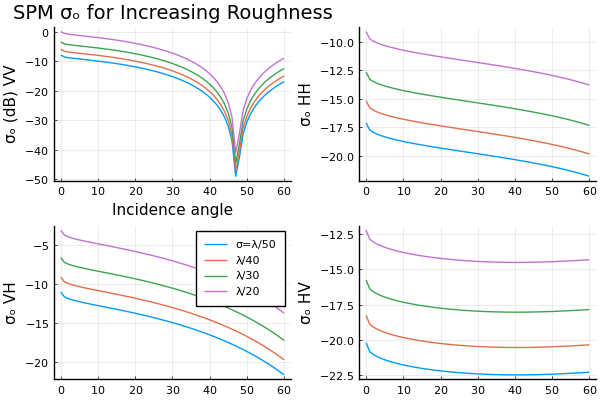

In [202]:
## In this cell, we select several values of roughness for a fixed scattering angle (θₛ,ϕₛ) and incoming azimuth (ϕ)
# The incoming incidence angle is fixed 


include("../modules/scattering.jl")
# plot BRCS of SPM in for varying incidence/scattering angles only for a single soil moisture value
θᵥ = .2 # let's go with 20% soil moisture content
l = 1
λ = 25e-2
σ = λ .* [1/50 1/40 1/30 1/20]
m = sqrt(2).*σ./l
ϕ  = 0 #15
ϕₛ = 35
θₛ = 45
θᵢ = 0:60

σʳ_vh = zeros(length(θᵢ),length(σ))
σʳ_hv = zeros(length(θᵢ),length(σ))
σʳ_vv = zeros(length(θᵢ),length(σ))
σʳ_hh = zeros(length(θᵢ),length(σ))
if λ*σ[end] < l^2/2.76
    for i = 1 : length(θᵢ)
        for j = 1 : length(σ)
            θₛ = θᵢ[i]
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ,ϕₛ,l,σ[j],θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
l = @layout [a b; c d]
p1 = plot(θᵢ, 10 *log10.(σʳ_vv),label=false)
xlabel!("Incidence angle")
ylabel!("σₒ (dB) VV")
title!("SPM σₒ for Increasing Roughness")
p2 = plot(θᵢ, 10 *log10.(σʳ_hh),label=false)
ylabel!("σₒ HH")
p3 = plot(θᵢ, 10 *log10.(σʳ_vh),label=["σ=λ/50" "λ/40" "λ/30" "λ/20"])
ylabel!("σₒ VH")
p4 = plot(θᵢ, 10 *log10.(σʳ_hv),label=false)
ylabel!("σₒ HV")
plot(p1, p2, p3, p4, layout = l)


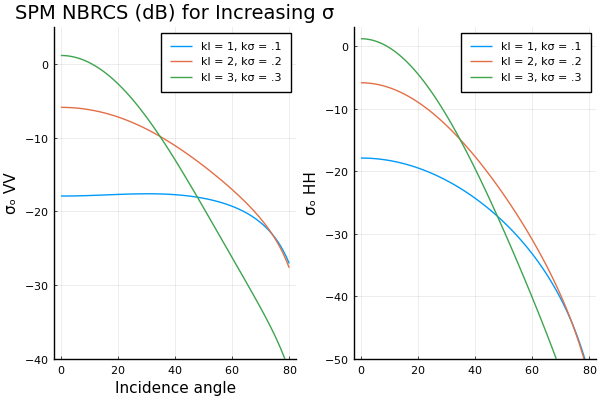

In [102]:
## Now, the next cells are in place to to generate plots to compare to results in Ulaby book
# we set the roughness/permittivity etc. to match the book plot values and compare. The direct comparisons are in a powerpoint


include("../modules/scattering.jl")
# their roughness scales are kl = 1.0, kσ = 0.1; kl = 2.0, kσ = 0.2; kl = 3.0, kσ = 0.3;
#for 25cm wavelength....
ϵₒ = 8.854e-12
θᵥ = 0.338 #gives ϵᵣ~= 20
λ = 25e-2
k = 2 * pi/λ
kl = [1.0, 2.0, 3.0]
kσ = [0.1, 0.2, 0.3]
l = kl ./k
σ = kσ ./k
ϕₛ = 0
θᵢ = 0:80

σʳ_vh = zeros(length(θᵢ),length(σ))
σʳ_hv = zeros(length(θᵢ),length(σ))
σʳ_vv = zeros(length(θᵢ),length(σ))
σʳ_hh = zeros(length(θᵢ),length(σ))
if λ*σ[end] < l[end]^2/2.76
    for i = 1 : length(θᵢ)
        for j = 1 : length(σ)
            θₛ = θᵢ[i]
#             σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_SPM_tsang.(λ,θᵢ[i],ϕ,θₛ,ϕₛ,l[j],σ[j],θᵥ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j]  = Scattering.BRCS_SPM_backscatter(λ,θᵢ[i],l[j],σ[j],θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end


l = @layout [a b]
p1 = plot(θᵢ, 10 *log10.(σʳ_vv),label=["kl = 1, kσ = .1" "kl = 2, kσ = .2" "kl = 3, kσ = .3"],ylims=(-40, 5))
title!("SPM NBRCS (dB) for Increasing σ")
xlabel!("Incidence angle")
ylabel!("σₒ VV")
p2 = plot(θᵢ, 10 *log10.(σʳ_hh),label=["kl = 1, kσ = .1" "kl = 2, kσ = .2" "kl = 3, kσ = .3"],ylims=(-50, 3))
ylabel!("σₒ HH")
plot(p1, p2, layout = l)

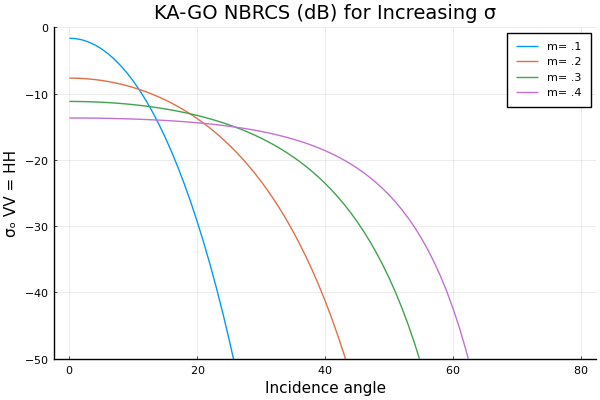

In [105]:
# note: Must manually edit relative permattivity in the code to be 1.6 to match the Ulaby book. Topp model doesn't go below ~3
include("../modules/scattering.jl")

ϵₒ = 8.854e-12
λ = 25e-2
k = 2 * pi/λ
θᵥ = 0 #gives ϵᵣ~= 3
m = [0.1, .2, .3, .4]
l = 1
σ = m.*l./sqrt(2)
θᵢ = 0:80

σʳ_vh = zeros(length(θᵢ),length(σ))
σʳ_hv = zeros(length(θᵢ),length(σ))
σʳ_vv = zeros(length(θᵢ),length(σ))
σʳ_hh = zeros(length(θᵢ),length(σ))
if λ*σ[end] < l^2/2.76
     for i = 1 : length(θᵢ)
        for j = 1 : length(σ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA_backscatter(θᵢ[i],σ[j],l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
plot(θᵢ, 10 *log10.(σʳ_vv),label=["m= .1" "m= .2" "m= .3" "m= .4"],ylims=(-50, 0))
title!("KA-GO NBRCS (dB) for Increasing σ")
xlabel!("Incidence angle")
ylabel!("σₒ VV = HH")

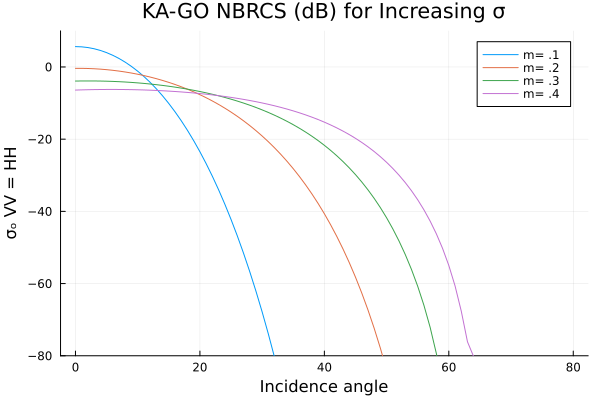

In [6]:
#this is the same call and plot using the bistatic code. However, I am not manually setting 
#the relative permittivity in the code to match

include("../modules/scattering.jl")
ϵₒ = 8.854e-12
λ = 25e-2
k = 2 * pi/λ
θᵥ = 0 #gives ϵᵣ~= 3
m = [0.1, .2, .3, .4]
l = 1
σ = m.*l./sqrt(2)
ϕ = 0
ϕₛ = 180
θᵢ = 0:80

σʳ_vh = zeros(length(θᵢ),length(σ))
σʳ_hv = zeros(length(θᵢ),length(σ))
σʳ_vv = zeros(length(θᵢ),length(σ))
σʳ_hh = zeros(length(θᵢ),length(σ))
if λ*σ[end] < l^2/2.76
     for i = 1 : length(θᵢ)
        for j = 1 : length(σ)
            θₛ = θᵢ[i]
#             σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA_backscatter(θᵢ[i],σ[j],l,θᵥ)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA(λ,θᵢ[i],ϕ,θₛ,ϕₛ,σ[j],l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
plot(θᵢ, 10 *log10.(σʳ_vv),label=["m= .1" "m= .2" "m= .3" "m= .4"],ylims=(-80, 10))
title!("KA-GO NBRCS (dB) for Increasing σ")
xlabel!("Incidence angle")
ylabel!("σₒ VV = HH")




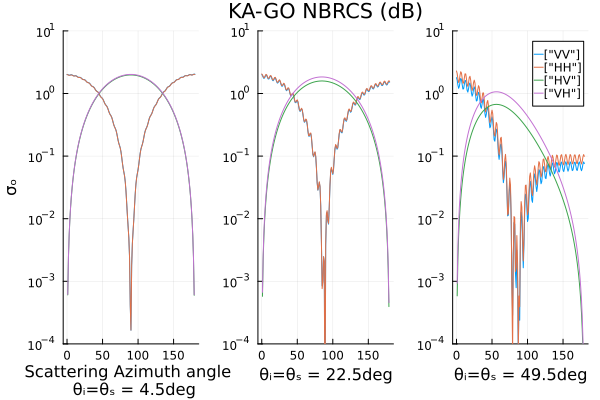

┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/loria/.julia/packages/Plots/AAjgN/src/utils.jl:91


In [7]:
# Azimuthal spin of GO model to match Ulaby book plots-- only comparison of bistatic results currently aware of
# Note: Unsure of where the oscillation in VV+HH is coming from.

include("../modules/scattering.jl")
ϵₒ = 8.854e-12
λ = 25e-2
k = 2 * pi/λ
θᵥ = .97 #gives ϵᵣ~= 81
θᵢ = [ 4.5 22.5 49.5]

ϕₛ = 0:180
ϕ = 0

m = 0.4
l = 1
σ = m.*l./sqrt(2)


σʳ_vh = zeros(length(θᵢ),length(ϕₛ))
σʳ_hv = zeros(length(θᵢ),length(ϕₛ))
σʳ_vv = zeros(length(θᵢ),length(ϕₛ))
σʳ_hh = zeros(length(θᵢ),length(ϕₛ))
if λ*σ[end] < l^2/2.76
     for i = 1 : length(θᵢ)
        for j = 1 : length(ϕₛ)
            θₛ = θᵢ[i]
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA(λ,θᵢ[i],ϕ,θₛ,ϕₛ[j],σ,l,θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end


l = @layout [a b c]
p1 = plot(ϕₛ, σʳ_vv[1,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_hh[1,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_hv[1,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_vh[1,:],yaxis=:log,ylims=(10^-4, 10),label=false)
xlabel!("Scattering Azimuth angle \n θᵢ=θₛ = 4.5deg")
ylabel!("σₒ")
    
p2 = plot(ϕₛ, σʳ_vv[2,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_hh[2,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_hv[2,:],yaxis=:log,ylims=(10^-4, 10),label=false)
plot!(ϕₛ, σʳ_vh[2,:],yaxis=:log,ylims=(10^-4, 10),label=false)
title!("KA-GO NBRCS (dB)")
xlabel!("θᵢ=θₛ = 22.5deg")

p3 = plot(ϕₛ, σʳ_vv[3,:],yaxis=:log,ylims=(10^-4, 10),label=["VV"])
plot!(ϕₛ, σʳ_hh[3,:],yaxis=:log,ylims=(10^-4, 10),label=["HH"])
plot!(ϕₛ, σʳ_hv[3,:],yaxis=:log,ylims=(10^-4, 10),label=["HV"])
plot!(ϕₛ, σʳ_vh[3,:],yaxis=:log,ylims=(10^-4, 10),label=["VH"])
xlabel!("θᵢ=θₛ = 49.5deg")

plot(p1, p2, p3, layout = l)

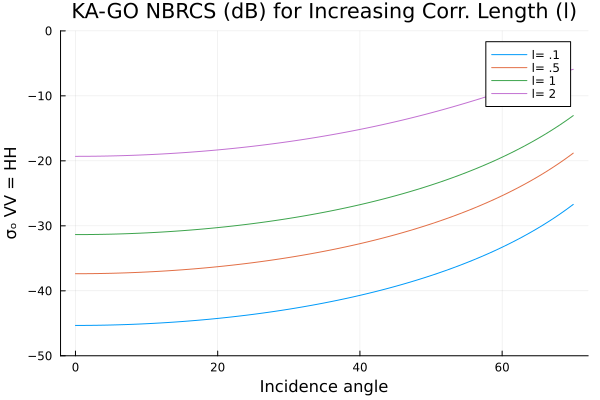

In [10]:
include("../modules/scattering.jl")
# How does changing values of correlation length affect rcs in backscatter-GO case?
# Increasing correlation length leads to higher RCS
ϵₒ = 8.854e-12
λ = 25e-2
k = 2 * pi/λ
θᵥ = 0 #gives ϵᵣ~= 3
θᵢ = 0:70

l = [.1 .25 .5 2]
σ = 2.5

σʳ_vh = zeros(length(θᵢ),length(l))
σʳ_hv = zeros(length(θᵢ),length(l))
σʳ_vv = zeros(length(θᵢ),length(l))
σʳ_hh = zeros(length(θᵢ),length(l))
if λ*σ < l[end]^2/2.76
     for i = 1 : length(θᵢ)
        for j = 1 : length(l)
            σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA_backscatter(θᵢ[i],σ,l[j],θᵥ)
        end
    end
else
    display("Doesn't meet surface criteria")
end
plot(θᵢ, 10 *log10.(σʳ_vv),label=["l= .1" "l= .5" "l= 1" "l= 2"],ylims=(-50, 0))
title!("KA-GO NBRCS (dB) for Increasing Corr. Length (l)")
xlabel!("Incidence angle")
ylabel!("σₒ VV = HH")

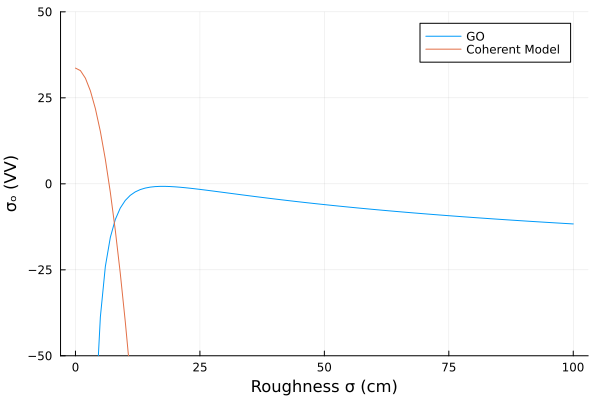

In [88]:
# Adding coherent and diffuse components at nadir direction with GO backscattering
# for increasing roughness: note, at low roughness levels the GO will technically not be valid
include("../modules/scattering.jl")

λ = 25e-2
k = 2 * pi/λ
θᵥ = .50 #gives ϵᵣ~= 3
θ = 35
θₛ = θ
l = .5
ϕ = 0
ϕₛ = 0
σ = 0:.01:1
patch_area = 1 # set to unit area for coherent NBRCS
σʳ_vh = zeros(length(σ));σʳ_hv = zeros(length(σ));σʳ_vv = zeros(length(σ));σʳ_hh = zeros(length(σ))
σᶜ_vh = zeros(length(σ));σᶜ_hv = zeros(length(σ));σᶜ_vv = zeros(length(σ));σᶜ_hh = zeros(length(σ))
for i = 1 : length(σ)
    σʳ_vh[i],  σʳ_hv[i],  σʳ_vv[i],  σʳ_hh[i] = Scattering.BRCS_KA_backscatter(θ,σ[i],l,θᵥ)
    σᶜ_vh[i],  σᶜ_hv[i],  σᶜ_vv[i],  σᶜ_hh[i] = Scattering.RCS_coherent(σ[i],θᵥ,λ,θ,ϕ,θₛ,ϕₛ)
end
plot(σ.*100,10 *log10.(σʳ_vv),label="GO")
plot!(σ.*100,10 *log10.(σᶜ_vv),label="Coherent Model",ylims=(-50, 50))
# vline!([l.^2/2.76/λ.*100], color=:black, label="GO Validity (σ< l²/(2.76λ)")
ylabel!("σₒ (VV)")
xlabel!("Roughness σ (cm)")



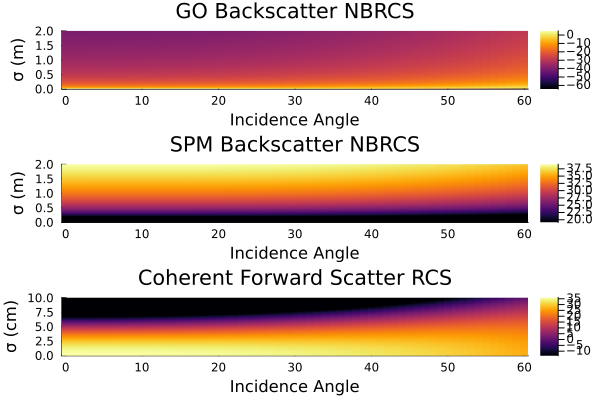

In [98]:
# Produce 3 images of: GO, SPM, Coherent models for X = roughness, Y = incidence angle, color = RCS
θ_vec = 0:60
σ_vec = 0:.01:2
l = 0.05
λ = 25e-2
θᵥ = .5

σʳ_vh = zeros(length(σ_vec),length(θ_vec));σʳ_hv = zeros(length(σ_vec),length(θ_vec));
σʳ_vv = zeros(length(σ_vec),length(θ_vec));σʳ_hh = zeros(length(σ_vec),length(θ_vec));
σˢ_vh = zeros(length(σ_vec),length(θ_vec));σˢ_hv = zeros(length(σ_vec),length(θ_vec));
σˢ_vv = zeros(length(σ_vec),length(θ_vec));σˢ_hh = zeros(length(σ_vec),length(θ_vec));
for i = 1 : length(σ_vec)
    for j = 1 : length(θ_vec)
        σʳ_vh[i,j],  σʳ_hv[i,j],  σʳ_vv[i,j],  σʳ_hh[i,j] = Scattering.BRCS_KA_backscatter(θ_vec[j],σ_vec[i],l,θᵥ)
#         σᶜ_vh[i,j],  σᶜ_hv[i,j],  σᶜ_vv[i,j],  σᶜ_hh[i,j] = Scattering.RCS_coherent(σ_vec[i],θᵥ,λ,θ_vec[j],0,θ_vec[j],0)
        σˢ_vh[i,j],  σˢ_hv[i,j],  σˢ_vv[i,j],  σˢ_hh[i,j] = Scattering.BRCS_SPM_backscatter(λ,θ_vec[j],l,σ_vec[i],θᵥ)
    end 
end
σ_vec2 = 0:.001:.1
σᶜ_vh = zeros(length(σ_vec2),length(θ_vec));σᶜ_hv = zeros(length(σ_vec2),length(θ_vec));
σᶜ_vv = zeros(length(σ_vec2),length(θ_vec));σᶜ_hh = zeros(length(σ_vec2),length(θ_vec));
for i = 1 : length(σ_vec2)
    for j = 1 : length(θ_vec)
        σᶜ_vh[i,j],  σᶜ_hv[i,j],  σᶜ_vv[i,j],  σᶜ_hh[i,j] = Scattering.RCS_coherent(σ_vec2[i],θᵥ,λ,θ_vec[j],0,θ_vec[j],0)
    end 
end

peak_value1 = 10*log10(maximum(σʳ_vv))
peak_value2 = 10*log10(maximum(σˢ_vv))
peak_value3 = 10*log10(maximum(σᶜ_vv))

l = @layout [p1; p2; p3]
p1 = heatmap(θ_vec, σ_vec, 10*log10.(σʳ_vv),
    xlabel="Incidence Angle",ylabel="σ (m)",
    title="GO Backscatter NBRCS",
    clim=(peak_value1-20, peak_value1));

peak_value1 = 10*log10(maximum(σʳ_vv))

p2 = heatmap(θ_vec, σ_vec, 10*log10.(σˢ_vv),
    xlabel="Incidence Angle",ylabel="σ (m)",
    title="SPM Backscatter NBRCS",
    clim=(peak_value2-20, peak_value2));

p3 = heatmap(θ_vec, σ_vec2.*100, 10*log10.(σᶜ_vv),
    xlabel="Incidence Angle",ylabel="σ (cm)",
    title="Coherent Forward Scatter RCS",
    clim=(peak_value3-50, peak_value3));

plot(p1, p2, p3, layout = l)